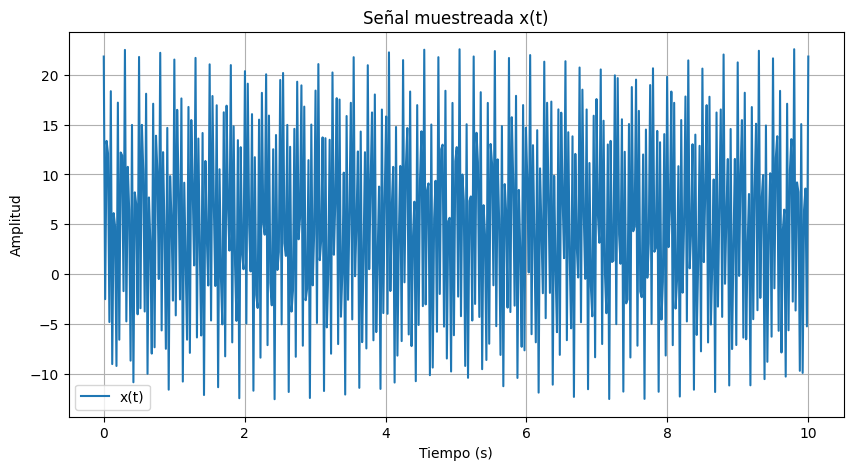

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
a = 6  # Último dígito de la cédula
k = 2 * (a + 1)  # Cálculo de k
#Para evitar aliasing, la frecuencia de muestreo debe ser al menos
#el doble de la máxima frecuencia presente fmaxima= 40 Hz
#respetando el teorema nyquist usamos 50 Hz para un muestreo más preciso
fs = 50  # Frecuencia de muestreo en Hz
t = np.linspace(0, 10, fs * 10)  # 10 segundos de muestras

# Definición de la señal
x_t = 4 * np.sin(8 * np.pi * t + np.pi / 4) + k * np.cos(40 * np.pi * t) + 5

# Graficar la señal muestreada
plt.figure(figsize=(10, 5))
plt.plot(t, x_t, label="x(t)", linewidth=1.5)
plt.title("Señal muestreada x(t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()


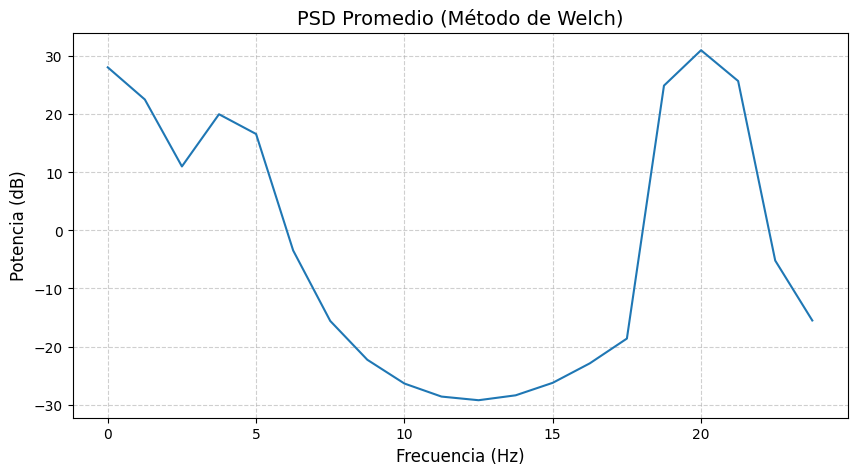

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de Hann
def hann_window(M):
    return 0.5 * (1 - np.cos(2 * np.pi * np.arange(M) / (M - 1)))

# Punto A: Dividir la señal en segmentos
def welch_segments(x, M, S):
    """
    Divide la señal en segmentos con solapamiento.

    x: señal de entrada
    M: número de puntos por segmento
    S: desplazamiento entre segmentos
    """
    N = len(x)
    K = (N - M) // S + 1  # Número de segmentos
    segments = np.zeros((K, M))

    for k in range(K):
        start = k * S
        end = start + M
        segments[k, :] = x[start:end]

    return segments

# Punto B: Multiplicar por la ventana y calcular la DFT
def welch_dft_segments(segments, window_func):
    """
    Aplica una ventana a cada segmento y calcula la DFT.

    segments: matriz con segmentos
    window_func: función de ventana
    """
    num_segments, M = segments.shape
    dft_segments = np.zeros((num_segments, M), dtype=complex)
    for k in range(num_segments):
        windowed_segment = segments[k, :] * window_func
        dft_segments[k, :] = np.fft.fft(windowed_segment)
    return dft_segments

# Punto C: Calcular el periodograma modificado
def welch_periodogram(dft_segments, window_func):
    """
    Calcula el periodograma modificado para cada segmento.

    dft_segments: DFT de los segmentos
    window_func: función de ventana
    """
    W = np.sum(window_func**2)  # Normalización
    num_segments, M = dft_segments.shape
    periodogram = np.zeros((num_segments, M))

    for k in range(num_segments):
        periodogram[k, :] = (1 / W) * np.abs(dft_segments[k, :])**2

    return periodogram

# Punto D: Promediar los periodogramas
def welch_average_periodogram(periodograms):
    """
    Promedia los periodogramas para estimar la PSD.

    periodograms: matriz de periodogramas
    """
    return np.mean(periodograms, axis=0)


# Parámetros
M = 40  # Número de puntos por segmento
S = 25  # Desplazamiento (solapamiento)
hann = hann_window(M)

# Aplicar el método de Welch
segments = welch_segments(x_t, M, S)
dft_segments = welch_dft_segments(segments, hann)
periodograms = welch_periodogram(dft_segments, hann)
average_psd = welch_average_periodogram(periodograms)

# Frecuencias asociadas
frequencies = np.fft.fftfreq(M, d=1/fs)

# Graficar resultados
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:M//2], 10 * np.log10(average_psd[:M//2]))
plt.title("PSD Promedio (Método de Welch)", fontsize=14)
plt.xlabel("Frecuencia (Hz)", fontsize=12)
plt.ylabel("Potencia (dB)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


<ipython-input-16-30e9b65b5ecf>:28: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w_high * nyquist / np.pi, 20 * np.log10(abs(h_high)), 'b')


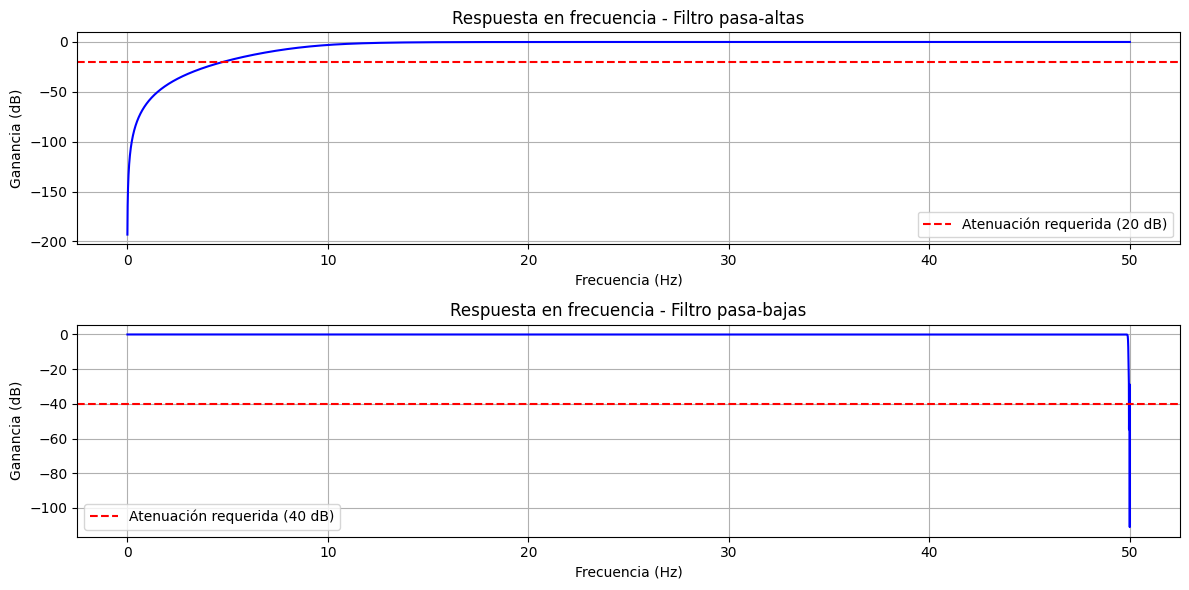

In [16]:
from scipy.signal import butter, freqz
import matplotlib.pyplot as plt
import numpy as np

# Frecuencia de muestreo
fs = 100  # Hz
nyquist = fs / 2  # Frecuencia de Nyquist

# Filtro pasa-altas
f_cut_high = 10  # Frecuencia de corte (Hz)
order_high = 3  # Orden del filtro (ajustable)
b_high, a_high = butter(order_high, f_cut_high / nyquist, btype='high')

# Filtro pasa-bajas (ajustar frecuencia de corte ligeramente por debajo de Nyquist)
f_cut_low = 49.9  # Frecuencia de corte ajustada (Hz)
order_low = 6  # Orden del filtro (ajustable)
b_low, a_low = butter(order_low, f_cut_low / nyquist, btype='low')

# Calcular la respuesta en frecuencia
w_high, h_high = freqz(b_high, a_high, worN=8000)
w_low, h_low = freqz(b_low, a_low, worN=8000)

# Graficar la respuesta en frecuencia
plt.figure(figsize=(12, 6))

# Pasa-altas
plt.subplot(2, 1, 1)
plt.plot(w_high * nyquist / np.pi, 20 * np.log10(abs(h_high)), 'b')
plt.title("Respuesta en frecuencia - Filtro pasa-altas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Ganancia (dB)")
plt.grid(True)
plt.axhline(-20, color='r', linestyle='--', label="Atenuación requerida (20 dB)")
plt.legend()

# Pasa-bajas
plt.subplot(2, 1, 2)
plt.plot(w_low * nyquist / np.pi, 20 * np.log10(abs(h_low)), 'b')
plt.title("Respuesta en frecuencia - Filtro pasa-bajas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Ganancia (dB)")
plt.grid(True)
plt.axhline(-40, color='r', linestyle='--', label="Atenuación requerida (40 dB)")
plt.legend()

plt.tight_layout()
plt.show()
